## Observations and Insights 

In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
master_dataset = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
master_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [179]:
# Checking the number of mice.
mice_df = master_dataset[["Mouse ID"]].drop_duplicates()
mouse_counter = mice_df.count()
mouse_counter

Mouse ID    249
dtype: int64

In [180]:
# Grab the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df = master_dataset[["Mouse ID","Timepoint"]]
mice_df = mice_df.set_index("Mouse ID")
mice_df

,Timepoint
Mouse ID,
k403,0
k403,5
k403,10
k403,15
k403,20
...,...
z969,25
z969,30
z969,35


In [181]:
# Optional: Get all the data for the duplicate mouse ID. 


In [182]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = master_dataset[["Mouse ID"]].drop_duplicates()

In [183]:
# Checking the number of mice in the clean DataFrame.
mice_df = master_dataset[["Mouse ID"]].drop_duplicates()
mouse_counter = mice_df.count()
mouse_counter

Mouse ID    249
dtype: int64

## Summary Statistics

In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
x = master_dataset[["Drug Regimen","Tumor Volume (mm3)"]]
drug_regimen = x.groupby("Drug Regimen")
mean = drug_regimen.mean()
median = drug_regimen.median()
std = drug_regimen.std()
variance = drug_regimen.var()
SEM = drug_regimen.sem()
summary_df = pd.DataFrame({
    "Mean":mean["Tumor Volume (mm3)"],
    "Median":median["Tumor Volume (mm3)"],
    "Variance":variance["Tumor Volume (mm3)"],
    "Standard Deviation":std["Tumor Volume (mm3)"],
    "SEM":SEM["Tumor Volume (mm3)"]
})

summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

([<matplotlib.axis.XTick at 0x7fd4a395ce50>,
 <a list of 10 Text xticklabel objects>)

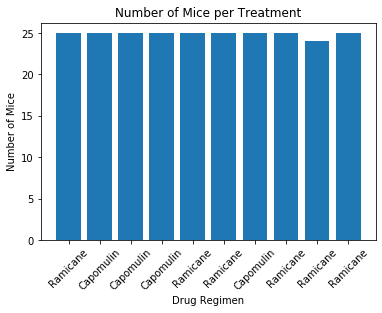

In [185]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_df = master_dataset[["Mouse ID","Drug Regimen"]].drop_duplicates()
x = mice_df.groupby("Drug Regimen")
count_per_treatment = x.count()
count_per_treatment
x_axis = np.arange(len(count_per_treatment))
bar_plot = plt.bar(x_axis,count_per_treatment["Mouse ID"])
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_df["Drug Regimen"],rotation=45)

([<matplotlib.axis.XTick at 0x7fd4a3b965d0>,
 <a list of 10 Text xticklabel objects>)

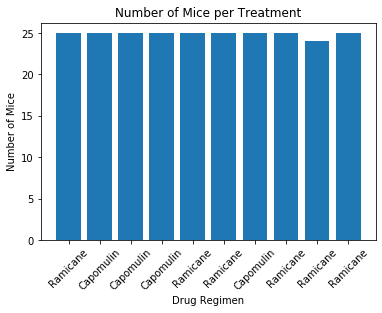

In [186]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_df = master_dataset[["Mouse ID","Drug Regimen"]].drop_duplicates()
x = mice_df.groupby("Drug Regimen")
count_per_treatment = x.count()
count_per_treatment
x_axis = np.arange(len(count_per_treatment))
bar_plot = plt.bar(x_axis,count_per_treatment["Mouse ID"])
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_df["Drug Regimen"],rotation=45)


/Users/danielcarrillo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Number of Male Mice & Female Mice')

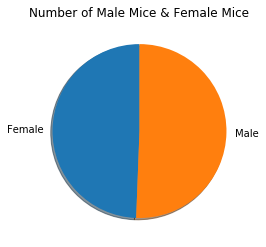

In [187]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_df = master_dataset[["Sex","Mouse ID"]]
mice_df
x = mice_df.groupby("Sex")
gender_count = x.count()
gender_count

mouse_pie = plt.pie(gender_count, labels = ["Female","Male"], shadow=True, startangle=90)
gender_count
plt.title("Number of Male Mice & Female Mice")


/Users/danielcarrillo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Number of Male Mice & Female Mice')

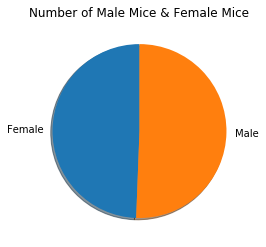

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_df = master_dataset[["Sex","Mouse ID"]]
mice_df
x = mice_df.groupby("Sex")
gender_count = x.count()
gender_count

mouse_pie = plt.pie(gender_count, labels = ["Female","Male"], shadow=True, startangle=90)
gender_count
plt.title("Number of Male Mice & Female Mice")

## Quartiles, Outliers and Boxplots

In [189]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
x = master_dataset[["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
group_by = x.groupby("Mouse ID")
greatest_timepoint = group_by.max()
greatest_timepoint

# Filter Drug Regimen
filtered_values = greatest_timepoint.loc[(
    greatest_timepoint["Drug Regimen"] == "Capomulin") | (
    greatest_timepoint["Drug Regimen"] == "Ramicane") | (
    greatest_timepoint["Drug Regimen"] == "Infubinol") | (
    greatest_timepoint["Drug Regimen"] == "Ceftamin")]
filtered_values
tumor_volume_values = pd.DataFrame(filtered_values["Tumor Volume (mm3)"])
tumor_volume_values = tumor_valume_values.rename(columns={"Tumor Volume (mm3)":"Tumor Volume at Final Timepoint (mm3)"})
t = tumor_volume_values.reset_index()

### Merge this group df with the original dataframe to get the tumor volume at the last timepoint

master_dataset2 = pd.merge(t, master_dataset)
master_dataset2



,Mouse ID,Tumor Volume at Final Timepoint (mm3),Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,67.973419,Infubinol,Female,20,23,0,45.000000,0
1,a203,67.973419,Infubinol,Female,20,23,5,48.508468,0
2,a203,67.973419,Infubinol,Female,20,23,10,51.852437,1
3,a203,67.973419,Infubinol,Female,20,23,15,52.777870,1
4,a203,67.973419,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
809,z581,62.754451,Infubinol,Female,24,25,25,54.316407,2
810,z581,62.754451,Infubinol,Female,24,25,30,56.286750,2
811,z581,62.754451,Infubinol,Female,24,25,35,58.628399,3
812,z581,62.754451,Infubinol,Female,24,25,40,60.053740,3


In [200]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = master_dataset["Drug Regimen"]
treatments = treatments.unique()

# Create empty list to fill with tumor vol data (for plotting)
# tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [191]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [76]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [77]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
